In [9]:
import matplotlib.pyplot as plt
import os, sys

from astropy.io import fits
from astropy.table import Table

import numpy as np

import matplotlib.colors as colors
from astropy.visualization import imshow_norm, MinMaxInterval, LogStretch,PercentileInterval, ImageNormalize

import sep
sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))
from catalog import *
import sep

(https://stackoverflow.com/questions/37031356/check-if-points-are-inside-ellipse-faster-than-contains-point-method)

In [10]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import numpy as np

# fig,ax = plt.subplots(1)
# ax.set_aspect('equal')

# # Some test points
# x = np.random.rand(500)*0.5+0.7
# y = np.random.rand(500)*0.5+0.7

# # The ellipse
# g_ell_center = (0.8882, 0.8882)
# g_ell_width = 0.36401857095483
# g_ell_height = 0.16928136341606
# angle = 30.

# g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='green', linewidth=2)
# ax.add_patch(g_ellipse)

# cos_angle = np.cos(np.radians(180.-angle))
# sin_angle = np.sin(np.radians(180.-angle))

# xc = x - g_ell_center[0]
# yc = y - g_ell_center[1]

# xct = xc * cos_angle - yc * sin_angle
# yct = xc * sin_angle + yc * cos_angle 

# rad_cc = (xct**2/(g_ell_width/2.)**2) + (yct**2/(g_ell_height/2.)**2)

# # Set the colors. Black if outside the ellipse, green if inside
# colors_array = np.array(['black'] * len(rad_cc))
# colors_array[np.where(rad_cc <= 1.)[0]] = 'green'

# ax.scatter(x,y,c=colors_array,linewidths=0.3)

# plt.show()

In [11]:
import pandas as pd
readme = pd.read_fwf('/home/kevin/Documents/HH24/schonhut-stasik/columns.txt', sep='\s+',
            header=None, skiprows=3, names=['columns','format','unit','name','description'])

In [12]:
readme

,columns,format,unit,name,description
0,1- 9,I9,---,EPIC,EPIC identifier
1,11- 28,A18,---,APOGEE,APOGEE identifier
2,30- 48,I19,---,Gaia,Gaia DR3 identifier
3,50- 58,A9,---,Camp,K2 campaign number(s)
4,60- 67,F8.4,deg,RAdeg,[8/360] Right Ascension (J2000)
...,...,...,...,...,...
70,419-425,F7.2,km/s,V,The V velocity
71,427-433,F7.2,km/s,e_V,?=-999 Uncertainty in V
72,435-441,F7.2,km/s,W,The W velocity
73,443-449,F7.2,km/s,e_W,?=-999 Uncertainty in W


In [13]:
import numpy as np
t=np.array([type(c) for c in readme['columns']])
indx = np.arange(len(readme))

rm = readme.iloc[t!=float]

In [14]:
col_i = [r.split('-') for r in rm['columns']]
col_t = [(int(c[0])-1, int(c[1])) for c in col_i]

In [15]:
red_giants = pd.read_fwf('/home/kevin/Documents/HH24/schonhut-stasik/catalog.dat', names=rm['name'], colspecs=col_t)
len(red_giants)

7672

## Revised Catalog

In [24]:
red_giants_rev=pd.read_csv('/home/kevin/Documents/HH24/schonhut-stasik/apok2_compiled_dec20.csv', low_memory=False)

In [25]:
red_giants_rev.head()

,angDist,epic,apogee,gaia_source,camp,ra,dec,glat,glon,ev,...,radial_velocity_error,ages_mean,ages_mean_e_upper,ages_mean_e_lower,ages_mean_sys_e,full_ages,rc_ages,rc_ages_merr,rc_ages_perr,rc_ages_mode
0,1.759477,214839814,2M18440396-2531219,4073390727810344576,7,281.017,-25.523,-9.82,9.19,RGB,...,NaN,8.862162,4.496892,2.983159,0.0,8.862162,-999.0,-999.0,-999.0,-999.0
1,1.286690,214829731,2M18511742-2532459,4074647637065331328,7,282.823,-25.546,-11.31,9.87,RC,...,NaN,-999.000000,-999.000000,-999.000000,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0
2,2.238501,214813041,2M18454357-2535041,4073380626047358208,7,281.432,-25.584,-10.19,9.30,RC,...,NaN,-999.000000,-999.000000,-999.000000,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0
3,1.624161,214825736,2M18494457-2533193,4074657055953883904,7,282.436,-25.555,-11.00,9.72,RC,...,NaN,-999.000000,-999.000000,-999.000000,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0
4,1.901095,215163750,2M18443057-2448014,4073502671843176704,7,281.127,-24.800,-9.60,9.90,RGB,...,NaN,15.048374,7.954663,5.203867,0.0,15.000000,15.0,4.7,6.9,13.8


In [38]:
red_giants_rev[['gaia_source','ev']]

,gaia_source,ev
0,4073390727810344576,RGB
1,4074647637065331328,RC
2,4073380626047358208,RC
3,4074657055953883904,RC
4,4073502671843176704,RGB
...,...,...
7667,666153241540748160,RC
7668,3807789950184380288,RGB
7669,2631983382355649152,RGB
7670,3871939994034218112,RGB


In [16]:
sys.path.append(os.path.expanduser('~/repos/runawaysearch/src'))

from gaiastars import gaiastars as gs

In [20]:
red_giants[['Gaia','DR3']].head(10)

,Gaia,DR3
0,657961231375051264,1
1,3637132654493312512,0
2,4126325130252374528,0
3,3606298775037819392,0
4,3675439948842715648,0
5,3605235169336614400,0
6,4130505439095442944,0
7,3693228260274665472,0
8,3812520972624745472,0
9,3804835077108840448,0


In [ ]:
rg2 = gs()
rg2.from_source_idlist(red_giants_rev['gaia_source'])
print(f'Number of objects: {len(rg2.objs)}, Missing Source IDs: {rg2.objs.SOURCE_ID.isna().sum()}')

INFO: Query finished. [astroquery.utils.tap.core]
Number of objects: 7672, Missing Source IDs: 3981


In [27]:
rg.objs.head(10)

,SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,r_est
typed_id,,,,,,,,,,,,
657961231375051264,657961231375051264,129.439265,15.981679,3.426026,-0.172898,-36.662754,-26.852535,9.154672,9.692638,8.464336,1.114129,291.883374
3637132654493312512,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126325130252374528,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606298775037819392,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3675439948842715648,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3605235169336614400,3605235169336614400,204.949622,-16.134272,1.783218,-22.793919,8.432537,-50.258320,9.343799,9.882696,8.650748,1.176460,560.783996
4130505439095442944,4130505439095442944,252.424880,-20.026657,0.364122,-0.786380,-7.247835,-114.318077,13.259329,13.916661,12.470803,1.004659,2746.332214
3693228260274665472,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3812520972624745472,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
rg2 = gs()
rg2.from_source_idlist(red_giants_rev['gaia_source'])
print(f'Number of objects: {len(rg2.objs)}, Missing Source IDs: {rg2.objs.SOURCE_ID.isna().sum()}')

INFO: Query finished. [astroquery.utils.tap.core]
Number of objects: 7672, Missing Source IDs: 0


/home/kevin/anaconda3/envs/Subaru/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


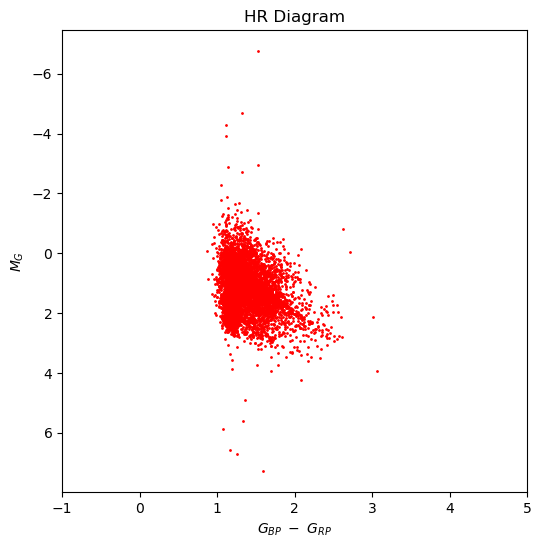

In [ ]:
fig, ax = plt.subplots( figsize=(6, 6))

rg2.plot_hrdiagram(ax=ax, color='red', label='Schonhut-Stasik Catalog')

In [246]:
rg.objs.radial_velocity.isna().sum()

4092

In [247]:
rg_tbl = Table.from_pandas(rg.objs.dropna(subset=['SOURCE_ID', 'ra', 'dec','parallax','pmra','pmdec']))

In [248]:
rg_tbl

SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,r_est
int64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64
657961231375051264,129.43926537069075,15.98167941225866,3.4260259025916113,-0.17289757571311437,-36.662753883521134,-26.852535,9.154672,9.692638,8.464336,1.1141291,291.88337404091186
3605235169336614400,204.9496216667044,-16.134271603912854,1.7832177934519862,-22.79391922112145,8.43253745317606,-50.25832,9.343799,9.882696,8.650748,1.1764596,560.7839960278668
4130505439095442944,252.42488038890264,-20.026657423210086,0.3641220078817782,-0.7863802309906165,-7.247835348040929,-114.31808,13.259329,13.916661,12.470803,1.0046589,2746.332213802019
609605736481635200,130.4039874003426,14.865198844174481,1.4432699124618276,-1.4503742719980444,-4.366020049858381,11.107081,9.915003,10.388747,9.2774,1.0803409,692.871091793406
598595708076959872,133.35437931285333,10.680742198939207,1.019008121081406,8.61225282066815,-3.6304843472016053,23.576633,9.629086,10.211485,8.903855,0.95777404,981.346447895593
604967244817098240,132.57608510110327,11.922538671175415,1.294647982490923,-12.291588994772884,-4.0943091551081645,--,9.665227,10.208208,8.970953,1.0901133,772.4107352146676
3412369491113446912,74.45340423577034,22.094716503945897,1.465327515401346,9.349658671414522,-3.394045320197341,69.07198,10.315062,11.015869,9.499829,1.1611651,682.4412900798528
604696730596495744,133.06893593561463,11.32727383578348,1.1786922233481287,-11.138656421252609,-2.7023164339274683,--,9.695972,10.345045,8.924694,0.9383859,848.3978940316198
3605438063591567872,204.4365907067862,-15.948771609426213,1.959241693159898,13.326530292187357,-5.930504506655248,12.747066,10.390711,10.953168,9.685106,1.0457091,510.40155152434676


In [251]:
rg_tbl.write('/home/kevin/Documents/HH24/schonhut-stasik/red_giant_catalog.xml', table_id= 'SchontukStasik2024',format = 'votable', overwrite=True)

In [34]:
from astropy.coordinates import SkyCoord
import astropy.units as u
pleiades_coords = SkyCoord(ra='03:46:24.2',dec='24:06:50', unit=(u.hourangle, u.deg))
hh24Eb = SkyCoord(ra='5:46:08.3973',dec='-0:10:00.573', unit=(u.hourangle, u.deg))

In [14]:
Halpha_info = pd.DataFrame(columns=['Name', 'Gaia', 'Parallax', 'Paralax_error'],
                          data = [
['Halpha1',   3219118708937374208,1.1047305185746186, 0.9784005],
['Halpha2',  3219118498484191616, 2.0616781739749666, 0.29806274],
['Halpha3',   3219118498484144512, 3.161310577886153, 0.50830215],
['Halpha4',   3219118429764664832, 2.5633221914251982, 0.4574949],
['Halpha5',   3219117536412592000, 3.8567315506214412, 0.57923716],
])
Halpha_gaia = gs()
Halpha_gaia.from_source_idlist(Halpha_info.Gaia)

INFO: Query finished. [astroquery.utils.tap.core]


In [15]:
Halpha_gaia.objs

,SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,r_est
typed_id,,,,,,,,,,,,
3219118708937374208,3219118708937374208,86.547347,-0.132024,1.104731,-0.710564,-0.556336,NaN,20.657671,21.158802,19.463142,0.984596,905.198130
3219118498484191616,3219118498484191616,86.551093,-0.135506,2.061678,1.175458,-0.047679,NaN,19.055824,21.543180,17.502377,1.069138,485.041755
3219118498484144512,3219118498484144512,86.554203,-0.137463,3.161311,0.544461,-0.391617,NaN,19.944523,21.008551,18.607162,1.014907,316.324504
3219118429764664832,3219118429764664832,86.554869,-0.152812,2.563322,-3.437911,-3.093887,NaN,19.773161,21.317469,18.441061,1.049762,390.118731
3219117536412592000,3219117536412592000,86.556566,-0.176256,3.856732,11.175783,-7.949137,NaN,20.060827,21.506037,18.730602,1.072343,259.286908


In [16]:
Halpha_info.set_index('Gaia', inplace=True)

In [17]:
Halpha_gaia.objs = Halpha_gaia.objs.join(Halpha_info)

In [18]:
Halpha_gaia.objs[['SOURCE_ID','Name']]

,SOURCE_ID,Name
typed_id,,
3219118708937374208,3219118708937374208,Halpha1
3219118498484191616,3219118498484191616,Halpha2
3219118498484144512,3219118498484144512,Halpha3
3219118429764664832,3219118429764664832,Halpha4
3219117536412592000,3219117536412592000,Halpha5


In [19]:
# pleiades_cone = gs()
# pleiades_cone.conesearch(pleiades_coords.ra,pleiades_coords.dec,3*u.deg)
# print(f'Cone Search returned {len(pleiades_cone.objs)} objects')

In [35]:
hh24Eb_cone = gs()
# hh24Eb_cone.gaia_source_constraints= [
#     '{schema}.gaia_source.source_id is not Null']
hh24Eb_cone.conesearch(hh24Eb.ra,hh24Eb.dec,3*u.deg)
print(f'Cone Search returned {len(hh24Eb_cone.objs)} objects')

INFO: Query finished. [astroquery.utils.tap.core]
Cone Search returned 44555 objects


/home/kevin/anaconda3/envs/Subaru/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


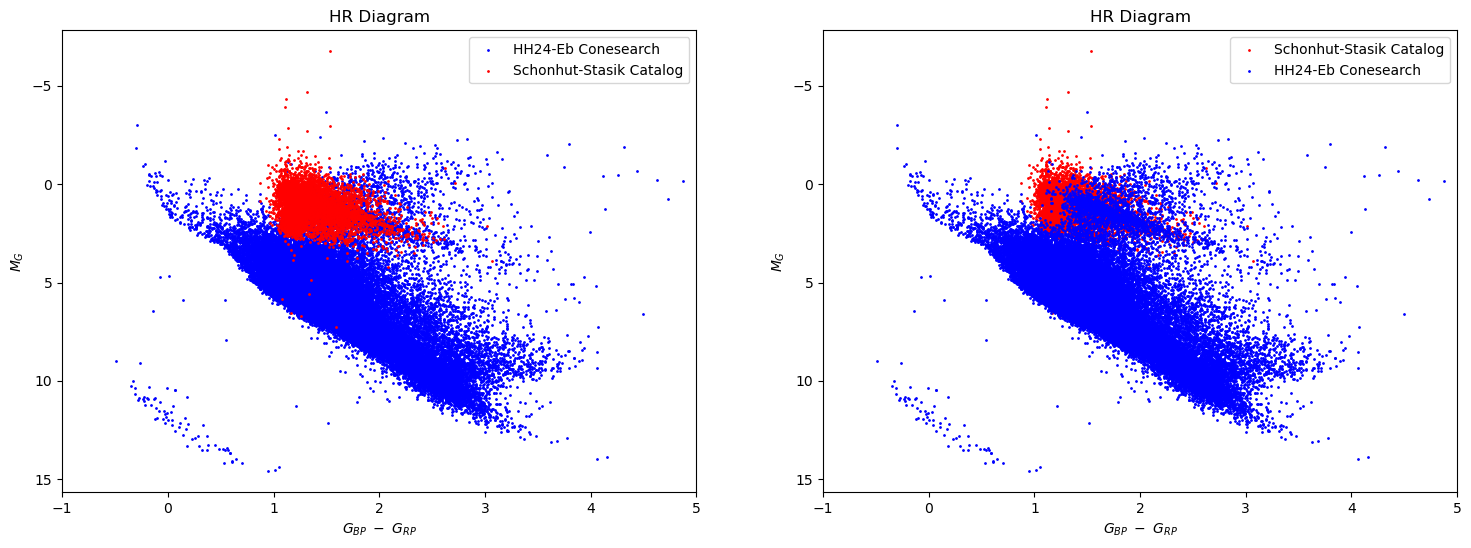

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
hh24Eb_cone.plot_hrdiagram(ax=axs[0], color='blue', label='HH24-Eb Conesearch')
rg2.plot_hrdiagram(ax=axs[0], color='red', label='Schonhut-Stasik Catalog')

rg2.plot_hrdiagram(ax=axs[1], color='red', label='Schonhut-Stasik Catalog')
hh24Eb_cone.plot_hrdiagram(ax=axs[1], color='blue', label='HH24-Eb Conesearch')

for ax in axs:
    ax.legend()

In [121]:
def add_halpha_to_ax(ax, halpha):
    halpha.plot_hrdiagram(ax=ax, s=40, color='black', marker='*')
    BP_RP, M_G = halpha.get_colors()
    for i, ha in enumerate(halpha.objs.iterrows()):
        ax.annotate(ha[1].Name, xy=(BP_RP.iloc[i], M_G.iloc[i]),
                    xytext=(BP_RP.iloc[i]*1.05, M_G.iloc[i]))


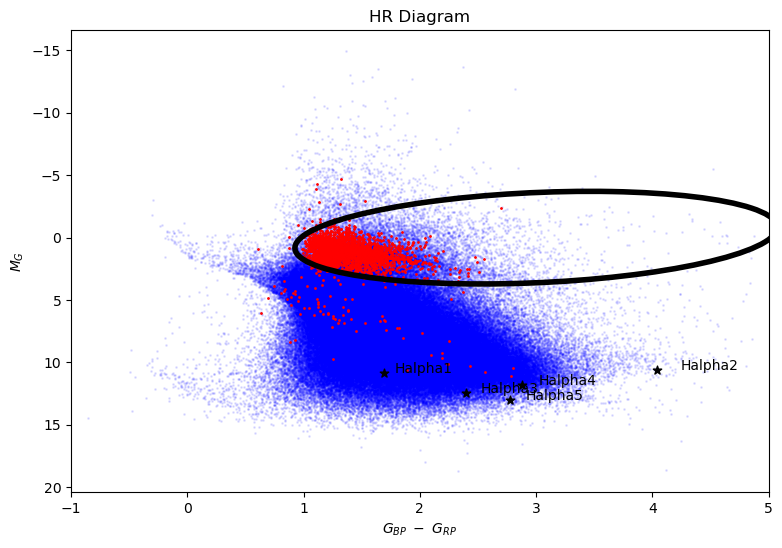

In [122]:
import matplotlib.patches as patches
# ellipse parameters in the color-mag space
xy = (3.0, 0);
a = 4.0
b = 7.5
theta =  10.0 # degrees

rgb = patches.Ellipse(xy, a, b, angle=theta, facecolor='None', ec='black', lw=4)

fig, ax = plt.subplots(figsize=(9,6))

hh24Eb_cone.plot_hrdiagram(ax=ax, color='blue', label='HH24-Eb Conesearch', alpha=0.1)
rg.plot_hrdiagram(ax=ax, color='red', label='Schonhut-Stasik Catalog')

add_halpha_to_ax(ax, Halpha_gaia)

ax.add_patch(rgb)


In [123]:
def pts_in_ellipse(ellipse, x, y):
    angle=ellipse['angle']
    a = ellipse['a']/2.0
    b = ellipse['b']/2.0
    center = ellipse['center']

    cos_angle = np.cos(np.radians(180.-angle))
    sin_angle = np.sin(np.radians(180.-angle))

    xc = x - center[0]
    yc = y - center[1]

    xct = xc * cos_angle - yc * sin_angle
    yct = xc * sin_angle + yc * cos_angle 

    rad_cc = (xct**2)/(a**2) + (yct**2)/(b**2)

    return rad_cc <= 1.0

/home/kevin/anaconda3/envs/Subaru/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


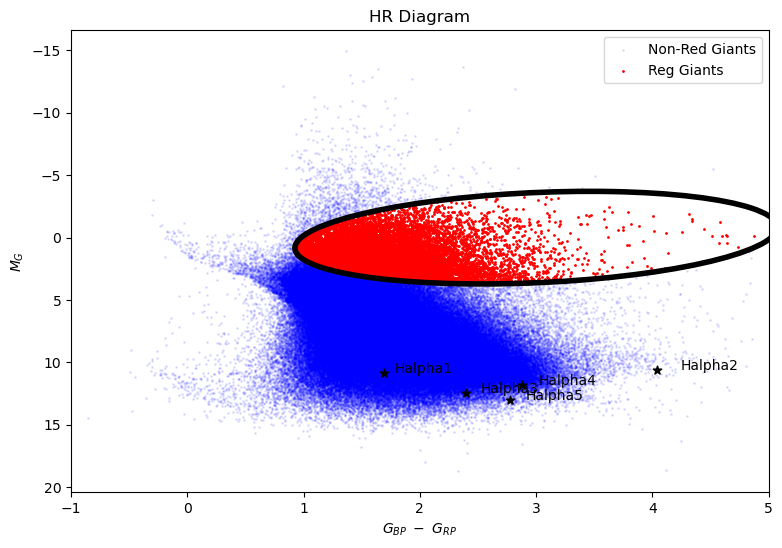

In [124]:
ellipse = {'center': (3.0,0), 'a':4.0,'b':7.5, 'angle':10.0}

BP_RP, M_G = hh24Eb_cone.get_colors()
in_ellipse = pts_in_ellipse(ellipse, BP_RP, M_G)

hh24Eb_cone.objs['red_giant'] = in_ellipse
rgs = hh24Eb_cone.query('red_giant')
nrgs = hh24Eb_cone.query('~red_giant')

xy = ellipse['center']
a = ellipse['a']
b = ellipse['b']
theta =  ellipse['angle'] # degrees



fig, ax = plt.subplots(figsize=(9,6))
rgb = patches.Ellipse(xy, a, b, angle=theta, facecolor='None', ec='black', lw=4)
nrgs.plot_hrdiagram(ax=ax, color='blue', label='Non-Red Giants', alpha=0.1)
rgs.plot_hrdiagram(ax=ax, color='red', label='Reg Giants')
add_halpha_to_ax(ax, Halpha_gaia)

ax.legend()

ax.add_patch(rgb)

In [125]:
len(rgs.objs), len(nrgs.objs)

(17305, 409350)

Text(0.5, 1.0, 'Distance Histogram\nRed Giant Branch')

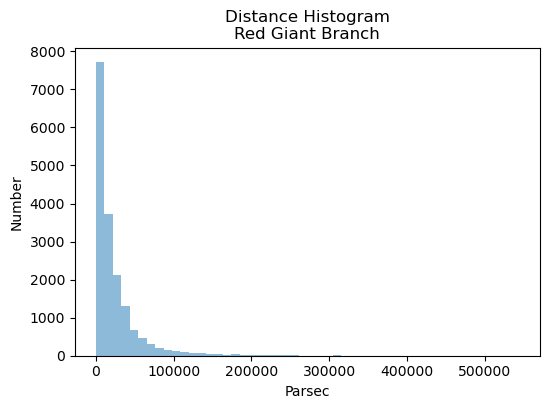

In [126]:
fig, ax = plt.subplots(figsize=(6,4))
zz=ax.hist(rgs.objs.r_est, bins=50, alpha=0.5)
ax.set_xlabel('Parsec')
ax.set_ylabel('Number')
ax.set_title('Distance Histogram\nRed Giant Branch')

In [127]:
rgs.objs.head()

,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,r_est,red_giant
source_id,,,,,,,,,,,,
3026171357615925120,89.308330,-1.276325,0.021501,0.424034,0.238497,NaN,18.768116,19.254591,18.095892,1.086842,46509.963243,True
3026171495053198464,89.325604,-1.244699,0.023499,-0.675983,-0.189115,NaN,19.657974,20.357008,19.041445,1.071839,42555.368794,True
3026171598134105472,89.270625,-1.286489,0.103630,0.886862,-0.566095,NaN,15.276062,16.091602,14.389632,0.937855,9649.709997,True
3026171666853581824,89.251999,-1.269372,0.376878,4.311163,-6.874306,NaN,15.314147,16.069105,14.460864,0.937143,2653.379945,True
3026171769932792192,89.264364,-1.267056,0.078991,-0.304741,0.344678,NaN,16.852217,17.413475,16.146448,0.956866,12659.594242,True


In [128]:
import astropy.units as u

def sky_velocity(gstar):
    mu = np.sqrt(gstar.objs.pmra**2 + gstar.objs.pmdec**2)
    mu_rad = (np.array(mu)*u.mas).to(u.radian).value
    sec = (1*u.year).to(u.second).value
    dist = (np.array(gstar.objs.r_est)*u.pc).to(u.km).value 
    vel = mu_rad*dist/sec

    return vel

                        


In [129]:
sky_velocity(rgs)

array([107.26390362, 141.60367107,  48.12902234, ...,  53.99000016,
       332.7705173 ,  44.04018941])

Text(0.5, 1.0, 'Sky Velocity Histogram\nRed Giant Branch')

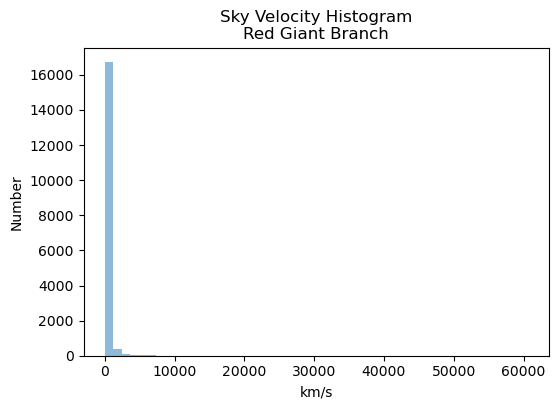

In [130]:
fig, ax = plt.subplots(figsize=(6,4))
zz=ax.hist(sky_velocity(rgs), bins=50, alpha=0.5)
ax.set_xlabel('km/s')
ax.set_ylabel('Number')
ax.set_title('Sky Velocity Histogram\nRed Giant Branch')

In [131]:
distance_bins = {'r < 250':250, '250 <= r < 500':500, '500 <= r < 750':750, '750 <= r < 1000':1000, '1000 <= r < 2000':2000, '2000 <= r < 5000':5000}
bins = np.array([distance_bins[b] for b in distance_bins])
np.digitize(rgs.objs.r_est, bins)
bin_strs = np.array([b for b in distance_bins]+['over 5000'])

In [132]:
bin_strs

array(['r < 250', '250 <= r < 500', '500 <= r < 750', '750 <= r < 1000',
       '1000 <= r < 2000', '2000 <= r < 5000', 'over 5000'], dtype='<U16')

In [133]:
b = np.digitize(rgs.objs.r_est, bins, right=False)
pd.DataFrame({'r_est':rgs.objs.r_est, 'bin':b, 'range':bin_strs[b]} )

,r_est,bin,range
source_id,,,
3026171357615925120,46509.963243,6,over 5000
3026171495053198464,42555.368794,6,over 5000
3026171598134105472,9649.709997,6,over 5000
3026171666853581824,2653.379945,5,2000 <= r < 5000
3026171769932792192,12659.594242,6,over 5000
...,...,...,...
3319225149542968320,10871.726685,6,over 5000
3319225600515073152,10937.499917,6,over 5000
3319228860394726144,11416.845335,6,over 5000


In [134]:
rgs.objs['distance_bin'] = b
rgs.objs['Range'] = bin_strs[b]
rgs.objs['SkyVelocity'] = sky_velocity(rgs)

In [135]:
bds = {'BD1':31.61, 'BD2':62.17, 'BD3':	22.76 }
col = {'BD1':'red', 'BD2':'green', 'BD3':'blue' }

/tmp/ipykernel_4568/4178535604.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zz=g.set_xticklabels(g.get_xticklabels(),rotation=90)


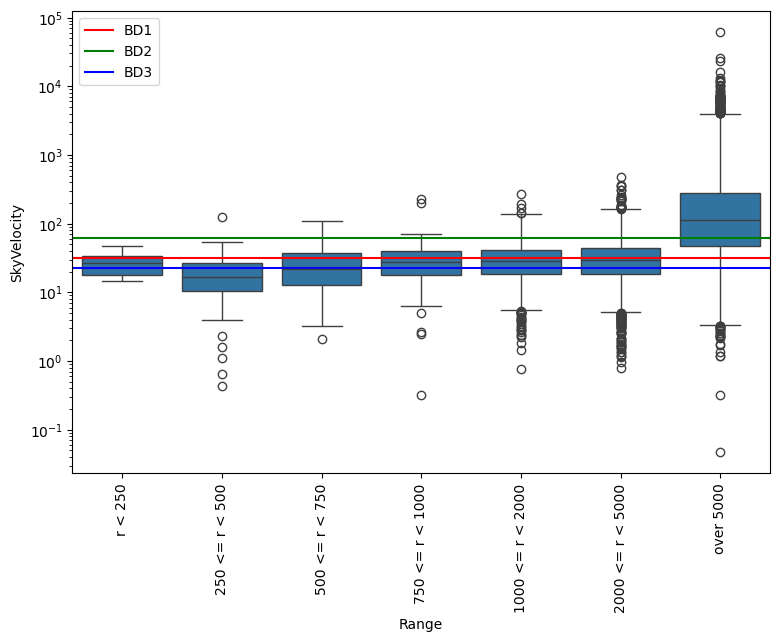

In [136]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,6))
g = sns.boxplot(ax=ax, data=rgs.objs, x='Range', y='SkyVelocity', order=bin_strs, log_scale=True)
for bd in bds:
    ax.axhline(bds[bd], label=bd, color=col[bd])
zz=g.set_xticklabels(g.get_xticklabels(),rotation=90)
ax.legend()

## Position Angles
for each object, calc position angle
take the angular mean within distance class

In [137]:
# su: magnitude of the motion (might be mu from spherical geometry)
su = np.sqrt(rgs.objs.pmra**2+ rgs.objs.pmdec**2)
rgs.objs['su'] = su

# position angles
rad = np.pi/2 - np.arctan2(rgs.objs.pmdec, rgs.objs.pmra) 
posangle = np.degrees(np.remainder(2*np.pi+rad, 2*np.pi))
rgs.objs['posangle'] = posangle


In [138]:
from astropy.stats import circmean, circstd
np.degrees(circmean(np.radians(rgs.objs.posangle))), np.degrees(circstd(np.radians(rgs.objs.posangle)))

(113.94354781954777, 65.90581464921128)

In [139]:
circmean(np.array(posangle)*u.deg)

<Quantity 113.94354782 deg>

In [140]:
for rng, df in rgs.objs.groupby('distance_bin'):
    print(f'Range: {rng}, mean: {np.degrees(circmean(np.radians(df.posangle)))}, std: {np.degrees(circstd(np.radians(df.posangle)))} ')

Range: 0, mean: 172.96513561483005, std: 50.3840180486294 
Range: 1, mean: 172.45899038551752, std: 66.21588032424543 
Range: 2, mean: 178.110641074373, std: 60.59261641956476 
Range: 3, mean: 165.3575550140163, std: 64.75265578333212 
Range: 4, mean: 146.44252922122726, std: 67.17645662845914 
Range: 5, mean: 107.78817596631013, std: 68.3984606178651 
Range: 6, mean: 111.50388070583166, std: 64.85082887346374 


In [141]:
def agg_func(indx, df):
    N = len(df)
    cm = np.degrees(circmean(np.radians(df.posangle)))
    cmstd = np.degrees(circstd(np.radians(df.posangle)))
    cm_e = cmstd/np.sqrt(N)
    v = df.SkyVelocity.mean()
    vstd = df.SkyVelocity.std()
    v_e = vstd/np.sqrt(N)
    rng_str = df.Range.iloc[0]

    return {'DistRng':rng_str, 'N':N, 'SkyVelocity':v, 'SkyVelocityError':v_e,
            'PosAngle': cm, 'PosAngleError': cm_e}

In [142]:
summary_tbl = Table(rows=[agg_func(rng, df) for rng, df in rgs.objs.groupby('distance_bin')],
                    units = [u.pc, None, u.km/u.second, u.km/u.second, u.deg, u.deg])
for c in ['SkyVelocity', 'SkyVelocityError', 'PosAngle', 'PosAngleError']:
    summary_tbl[c].info.format='.2f'



summary_tbl

DistRng,N,SkyVelocity,SkyVelocityError,PosAngle,PosAngleError
pc,,km / s,km / s,deg,deg
str16,int64,float64,float64,float64,float64
r < 250,10,27.91,3.50,172.97,15.93
250 <= r < 500,58,20.99,2.50,172.46,8.69
500 <= r < 750,104,27.28,1.93,178.11,5.94
750 <= r < 1000,190,31.28,1.74,165.36,4.70
1000 <= r < 2000,1017,32.35,0.67,146.44,2.11
2000 <= r < 5000,2822,35.56,0.57,107.79,1.29
over 5000,13104,305.50,7.85,111.50,0.57


In [143]:
hh24Eb_cone.objs.loc[3219171107539228032]

ra                   86.339081
dec                  -0.012723
parallax              2.421525
pmra                   0.43264
pmdec                -0.825382
radial_velocity            NaN
phot_g_mean_mag      16.184771
phot_bp_mean_mag      18.01576
phot_rp_mean_mag     14.903191
ruwe                   1.16815
r_est               412.962839
red_giant                False
Name: 3219171107539228032, dtype: object

In [144]:
FangTable = pd.read_fwf('/home/kevin/Documents/HH24/Fang2009/table6.dat', names=['id', 'ra','dec'],
                        colspecs=[(0,4), (4, 16), (16,28)])

In [145]:
FangTable

,id,ra,dec
0,1,05 45 21.38,-00 00 45.9
1,2,05 45 22.68,-00 14 27.5
2,3,05 45 26.16,+00 06 37.9
3,4,05 45 38.26,-00 08 11.0
4,5,05 45 41.68,-00 04 02.4
...,...,...,...
127,128,05 47 19.72,+00 01 21.8
128,129,05 47 19.90,+00 16 13.1
129,130,05 47 22.99,+00 17 56.7
130,131,05 47 25.05,+00 31 05.0


In [146]:
from astropy.coordinates import SkyCoord
FangCoords = SkyCoord(FangTable.ra, FangTable.dec, unit=(u.hourangle, u.deg), frame='fk5')
Fang_tbl = Table({'id':FangTable.id, 'icrs':FangCoords.icrs})

In [147]:
hh24Eb_cone.objs.index

Index([3026171318960693376, 3026171323256180864, 3026171490758392576,
       3026171357614268928, 3026171357615925120, 3026171387679164032,
       3026171387679164160, 3026171387680169984, 3026171387681094528,
       3026171391974743296,
       ...
       3319228864690759552, 3319228894755261056, 3319228929115452800,
       3319228933409141888, 3319228933409712896, 3319229066553569792,
       3319229066553953664, 3319229066554357248, 3319229070847352320,
       3319229070849420544],
      dtype='int64', name='source_id', length=426655)

In [148]:
gaia_coords = SkyCoord(hh24Eb_cone.objs.ra, hh24Eb_cone.objs.dec, unit=(u.deg, u.deg), frame='icrs')
gaia_tbl = Table({'GaiaDR3':list(hh24Eb_cone.objs.index), 'icrs':gaia_coords})

In [149]:
from astropy.table import Table, join_skycoord
from astropy import table

In [163]:
jt =table.join(gaia_tbl,Fang_tbl,  join_funcs = {'icrs':join_skycoord(1*u.arcsecond)})

In [164]:
jt

icrs_id,GaiaDR3,icrs_1,id,icrs_2
,,"deg,deg",,"deg,deg"
int64,int64,SkyCoord,int64,SkyCoord
1,3219582354952174848,"86.79573420876801,0.3589606487404995",122,"86.79574362114155,0.35894982228863553"
2,3219582458030819712,"86.80381707100946,0.3684813097310467",123,"86.80382695400868,0.3684776004660141"
3,3219586173178684544,"86.77488968645612,0.43138994929422353",111,"86.77491028421016,0.43142204348046564"
4,3219587165314966912,"86.70454202695448,0.47732422580081196",92,"86.70453528188463,0.47731092888343385"
5,3219587341409787136,"86.77222022225749,0.47946062500095227",109,"86.77224361516367,0.47947759890407965"
6,3219588578360363136,"86.85434139563776,0.517960693994489",131,"86.85436861332411,0.5180609362954541"
7,3219589226899368064,"86.77499849484617,0.5356338636816913",110,"86.77499361238398,0.5356998212623663"
8,3219589231195394944,"86.77910273556442,0.5322061142731537",114,"86.77911861256074,0.5321998214664401"


In [174]:
jt['icrs_1'].separation(jt['icrs_2']).max()

<Angle 0.000251 deg>

In [175]:
yso_df = hh24Eb_cone.objs.loc[jt['GaiaDR3']].copy()

In [176]:
yso = gs()
yso.objs=yso_df

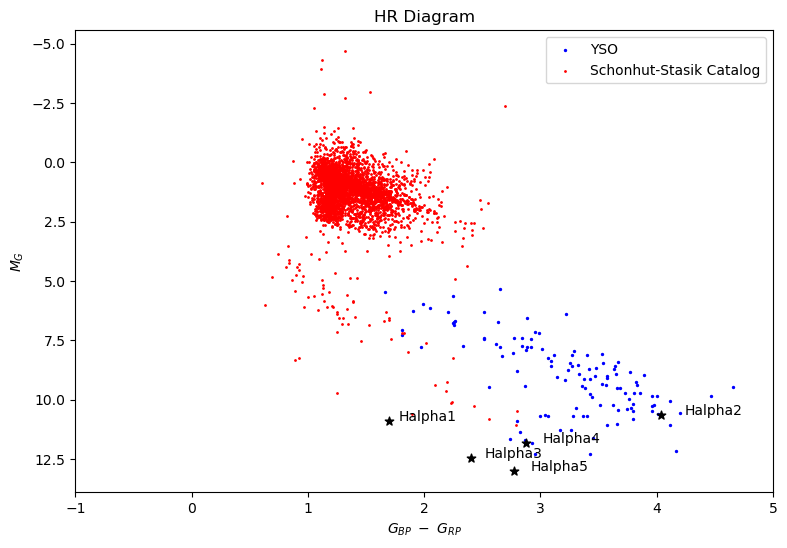

In [179]:
fig, ax = plt.subplots(figsize=(9,6))

#hh24Eb_cone.plot_hrdiagram(ax=ax, color='blue', label='HH24-Eb Conesearch')
yso.plot_hrdiagram(ax=ax, color='blue', s=2, label='YSO')
rg.plot_hrdiagram(ax=ax, color='red', label='Schonhut-Stasik Catalog')
add_halpha_to_ax(ax,Halpha_gaia)
ax.legend()

In [182]:
yso.objs.r_est.isna().sum(), yso.objs.pmra.isna().sum(), yso.objs.pmdec.isna().sum()

(9, 9, 9)

In [183]:
yso.objs.head()

,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,r_est,red_giant,YSO
source_id,,,,,,,,,,,,,
3219582354952174848,86.795734,0.358961,2.157050,-1.069508,-1.252564,NaN,18.546284,20.607382,17.099230,1.052882,463.596179,False,False
3219582458030819712,86.803817,0.368481,1.687486,-0.688316,-0.300136,NaN,20.206291,21.429123,18.606737,1.046515,592.597372,False,False
3219586173178684544,86.774890,0.431390,1.490540,-2.397946,-2.108450,NaN,19.797300,21.507265,18.229395,1.111996,670.897867,False,False
3219587165314966912,86.704542,0.477324,3.027419,-1.844338,-1.537849,NaN,19.868690,21.713480,18.284470,1.056932,330.314410,False,False
3219587341409787136,86.772220,0.479461,2.263752,0.082117,-0.473200,NaN,17.365803,19.425131,16.001566,0.898923,441.744595,False,False


In [184]:
Fang_tbl.add_index('id')

In [188]:
table.join(jt, Fang_tbl,keys='id')

icrs_id,GaiaDR3,icrs_1,id,icrs_2,icrs
,,"deg,deg",,"deg,deg","deg,deg"
int64,int64,SkyCoord,int64,SkyCoord,SkyCoord
66,3219171107539228032,"86.33908143899814,-0.01272256394883461",1,"86.33907697286186,-0.012744644904789335","86.33907697286186,-0.012744644904789335"
15,3219113378882611968,"86.34452506341641,-0.2409640749051967",2,"86.34449365098057,-0.24096686685518207","86.34449365098057,-0.24096686685518207"
79,3219198870207817856,"86.35900513562702,0.11052543439914347",3,"86.35899363334501,0.11053313387224813","86.35899363334501,0.11053313387224813"
28,3219121045400432256,"86.40944765383612,-0.13640506691363913",4,"86.40941031238476,-0.13638353026780428","86.40941031238476,-0.13638353026780428"
30,3219123038265248128,"86.42365752979127,-0.06734150086127584",5,"86.42366030892535,-0.06732797399886692","86.42366030892535,-0.06732797399886692"
18,3219116544274710912,"86.4247986253885,-0.2015090212929808",6,"86.42474364897205,-0.20146686283353554","86.42474364897205,-0.20146686283353554"
65,3219170553487486080,"86.42832024585366,-0.01718710281172888",7,"86.42832697308101,-0.017161307098650224","86.42832697308101,-0.017161307098650224"
124,3219222028671353344,"86.43489525063653,0.38284489261150934",8,"86.43486861973444,0.3828386932286767","86.43486861973444,0.3828386932286767"


In [192]:
FangTable.rename(columns={'ra': 'RA2000', 'dec':'DEC2000'}, inplace=True)


In [193]:
FangTable[:10]

,id,RA2000,DEC2000
0,1,05 45 21.38,-00 00 45.9
1,2,05 45 22.68,-00 14 27.5
2,3,05 45 26.16,+00 06 37.9
3,4,05 45 38.26,-00 08 11.0
4,5,05 45 41.68,-00 04 02.4
5,6,05 45 41.94,-00 12 05.3
6,7,05 45 42.80,-00 01 01.8
7,8,05 45 44.37,+00 22 58.2
8,9,05 45 44.56,-00 10 35.6
9,10,05 45 44.64,+00 13 00.6


In [198]:
FangCoords[91].icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (86.70453528, 0.47731093)>

In [221]:
jt['Separation'] = jt['icrs_1'].separation(jt['icrs_2']).to(u.arcsec)
jt['RowID'] = np.arange(len(jt))

In [222]:
jt

icrs_id,GaiaDR3,icrs_1,id,icrs_2,Separation,RowID
,,"deg,deg",,"deg,deg",arcsec,
int64,int64,SkyCoord,int64,SkyCoord,float64,int64
1,3219582354952174848,"86.79573420876801,0.3589606487404995",122,"86.79574362114155,0.35894982228863553",0.05164480234248591,0
2,3219582458030819712,"86.80381707100946,0.3684813097310467",123,"86.80382695400868,0.3684776004660141",0.038001454215225224,1
3,3219586173178684544,"86.77488968645612,0.43138994929422353",111,"86.77491028421016,0.43142204348046564",0.13728609369038428,2
4,3219587165314966912,"86.70454202695448,0.47732422580081196",92,"86.70453528188463,0.47731092888343385",0.05367512132386851,3
5,3219587341409787136,"86.77222022225749,0.47946062500095227",109,"86.77224361516367,0.47947759890407965",0.10404580010034885,4
6,3219588578360363136,"86.85434139563776,0.517960693994489",131,"86.85436861332411,0.5180609362954541",0.373936919805113,5
7,3219589226899368064,"86.77499849484617,0.5356338636816913",110,"86.77499361238398,0.5356998212623663",0.23809690227553695,6
8,3219589231195394944,"86.77910273556442,0.5322061142731537",114,"86.77911861256074,0.5321998214664401",0.06148065200231952,7


In [223]:
ids, counts = np.unique(jt['id'], return_counts=True)

In [224]:
ids[counts != 1]

30
66
79


In [226]:
jt[jt['id']==30]

icrs_id,GaiaDR3,icrs_1,id,icrs_2,Separation,RowID
,,"deg,deg",,"deg,deg",arcsec,
int64,int64,SkyCoord,int64,SkyCoord,float64,int64
81,3219201477252759680,"86.5387466548671,0.22564581798989772",30,"86.5386186276335,0.22572758729959097",0.5468794378604913,82
81,3219201481548029696,"86.53856583526905,0.2257463168794018",30,"86.5386186276335,0.22572758729959097",0.20165745176886998,83


In [227]:
jt[jt['id']==66]

icrs_id,GaiaDR3,icrs_1,id,icrs_2,Separation,RowID
,,"deg,deg",,"deg,deg",arcsec,
int64,int64,SkyCoord,int64,SkyCoord,float64,int64
59,3219149907579678848,"86.64411907821736,0.11222803478950338",66,"86.64391029998583,0.1120887036517435",0.903602501965019,59
59,3219149907580618368,"86.64391916663364,0.11207085642185743",66,"86.64391029998583,0.1120887036517435",0.07174220663864388,60


In [228]:
jt[jt['id']==79]

icrs_id,GaiaDR3,icrs_1,id,icrs_2,Separation,RowID
,,"deg,deg",,"deg,deg",arcsec,
int64,int64,SkyCoord,int64,SkyCoord,float64,int64
10,3219598748842930560,"86.66989677033497,0.45636243375761765",79,"86.66986861623631,0.4562553716077365",0.39852677935890346,9
10,3219598744546880384,"86.66990111104006,0.45621480354357213",79,"86.66986861623631,0.4562553716077365",0.18711736005728533,10


In [229]:
jt.remove_rows([82, 59,9])

In [230]:
FangCat = Table.from_pandas(FangTable)
FangCat.add_index('id')

In [238]:
FangCatalog = table.join(FangCat, jt[['id','GaiaDR3','Separation']], keys='id')
FangCatalog

id,RA2000,DEC2000,GaiaDR3,Separation
,,,,arcsec
int64,str11,str11,int64,float64
1,05 45 21.38,-00 00 45.9,3219171107539228032,0.08110113590731761
2,05 45 22.68,-00 14 27.5,3219113378882611968,0.11352956354980283
3,05 45 26.16,+00 06 37.9,3219198870207817856,0.0498289790200425
4,05 45 38.26,-00 08 11.0,3219121045400432256,0.1551847720887993
5,05 45 41.68,-00 04 02.4,3219123038265248128,0.04971384702392088
6,05 45 41.94,-00 12 05.3,3219116544274710912,0.2494076438481437
7,05 45 42.80,-00 01 01.8,3219170553487486080,0.09597051727004112
8,05 45 44.37,+00 22 58.2,3219222028671353344,0.09843256050782734


In [234]:
# test:
c = SkyCoord(ra = '05 47 22.99', dec='+00 17 56.7', unit=(u.hourangle, u.deg),frame='fk5')
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (86.84578529, 0.29908871)>

In [236]:
g = SkyCoord(ra=hh24Eb_cone.objs.loc[3219534221253563904].ra, dec=hh24Eb_cone.objs.loc[3219534221253563904].dec, unit=u.deg)
g

<SkyCoord (ICRS): (ra, dec) in deg
    (86.84579366, 0.29907502)>

In [237]:
g.separation(c.icrs)

<Angle 1.6042394e-05 deg>

In [240]:
FangCatalog.write('/home/kevin/Documents/HH24/Fang2009/fangcatalog.xml', table_id= 'fang_table_6',format = 'votable', overwrite=True)